In [4]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline 

# NumPy Arrays

### Creating arrays

In [248]:
# creating arrays from scratch
v = np.zeros([2,3,3], dtype=int)
np.ones([2,3,2])
np.full([3,2],np.pi)
np.arange(10,2,-2)
np.linspace(5,6,10)
np.random.random([5,3]))
np.empty((2,3, 2)) #uninitialized, use with caution! 

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

### Array Attributes

In [16]:
data = np.random.random([5, 7])
data = np.round(data*10)

# check data attributes
print(type(data))
print(data.size)
print(data.shape)
print(data.ndim)
print(data[0,0])
print(type(data[0,0]))
print(data.dtype)
print('Data item size: {} bytes'.format(data.itemsize))
print('Data total size: {} bytes'.format(data.nbytes))

<class 'numpy.ndarray'>
35
(5, 7)
2
2.0
<class 'numpy.float64'>
float64
Data item size: 8 bytes
Data total size: 280 bytes


### Array Indexing and Slicing 

In [274]:
# main rule -> start : stop : end 
print(data[3,2])
print(data[-1,-1])
print(data[2, 1:])
print(data[:,-1])
print(data[-2,-2])
print(data[::-1, ::-1]) # swap matrix


# rewrite some elements
data[:,0] = 0
data[-1,-1] = 1000
data

6.0
3.0
[1. 7. 7. 5. 9. 9.]
[7. 0. 9. 8. 3.]
1.0
[[ 3.  9.  8.  0.  0.  8.  9.]
 [ 8.  1.  2.  2.  6.  9.  1.]
 [ 9.  9.  5.  7.  7.  1.  4.]
 [ 0.  0.  7.  9.  2.  4.  9.]
 [ 7.  1.  5.  7. 10.  4.  4.]]


array([[   0.,    4.,   10.,    7.,    5.,    1.,    7.],
       [   0.,    4.,    2.,    9.,    7.,    0.,    0.],
       [   0.,    1.,    7.,    7.,    5.,    9.,    9.],
       [   0.,    9.,    6.,    2.,    2.,    1.,    8.],
       [   0.,    8.,    0.,    0.,    8.,    9., 1000.]])

In [299]:
a = np.array([[0,1,2],[3,4,5]])
print(a[1:][1:])
print(a[1:,1:])
a

[]
[[4 5]]


array([[0, 1, 2],
       [3, 4, 5]])

### Reshaping 

In [5]:
# main rule -> sizes of old and new matrices must be the same! 

vec = np.random.rand(12) # a one dimentional vector
print(vec.shape)

# reshape and print shape of new matrix
print(vec.reshape([3,4]).shape)

print(vec.reshape(-1,).shape) # -> row vector, one dimention == 'rank 1 array'
# do not use 1 rank array; better to explicitly define row vector or column vector

# print(vec[:, np.newaxis].shape) # -> row vector, two dimentions
# print(vec.reshape(1,-1).shape) # -> column vector, two dimentions
# print(vec[np.newaxis,:].shape) # -> column vector, two dimentions

(12,)
(3, 4)
(12,)


In [6]:
# check again 1 rank array
a = np.random.rand(5)
print(a.shape)
# transpose and check the shape
print(a.T.shape)
# ====> The same! 

assert(a.shape == (5,1)), 'Oh, no! This vector is a \"1 rank vector\"' 
# means if not conditions, raise attention error and print message

(5,)
(5,)


AssertionError: Oh, no! This vector is a "1 rank vector"

In [25]:
v1 = vec.reshape([3,4])
print(v1.shape)
print(v1.ravel().shape)
print(v1.flatten().shape)


(3, 4)
(12,)
(12,)
(3, 4)


### Concantenate Many Arrays 

In [19]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
print(arr1.shape)
np.concatenate((arr1, arr2)).shape
np.concatenate((arr1, arr2))

(3,)


array([1, 2, 3, 4, 5, 6])

In [14]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
print(arr1.shape)
np.concatenate((arr1, arr2), axis=1).shape

(2, 2)


(2, 4)

In [18]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
# similar to concantenate but concantinate is faster 
np.append(arr1, arr2) 

array([1, 2, 3, 4, 5, 6])

In [79]:
vst = np.vstack((arr1, arr2))

In [77]:
hst = np.hstack((arr1, arr2))

In [78]:
dst = np.dstack((arr1, arr2))

(1, 3, 2)

In [84]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
print(arr1.shape)
print(np.stack((arr1, arr2), axis=0).shape)
print(np.stack((arr1, arr2), axis=1).shape)

(3,)
(2, 3)
(3, 2)


In [85]:
# load many files
# from many 2D matices create one 3D data cube
Files = ['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv'] # just names

Data = np.loadtxt(Files[0], delimiter = ',') # read first file
DataCube = Data.copy() # create for future DataCube

# read next files and append
for name in Files[1:]:
    #print('Next file --> ', name)
    Data1 = np.loadtxt(name, delimiter = ',')
    print('Shape: {}'.format(Data1.shape))
    DataCube = np.dstack([DataCube, Data1])
    # try -> np.vstack([DataCube, Data1]). What's the result? 
    
print(DataCube.shape)

Shape: (5, 3)
Shape: (5, 3)
Shape: (5, 3)
(5, 3, 4)


In [59]:
# Think about efficiency
DataCube1 = np.zeros([5,3,4])
for (i, name) in enumerate(Files):
    Data1 = np.loadtxt(name, delimiter=',')
    DataCube1[:,:,i] = Data1
print(DataCube1.shape)

(5, 3, 4)


## Copy vs. views

In [66]:
data = DataCube1[:,:,1].copy()
data

array([[12.659  , 13.22477,  8.94481],
       [ 7.11298,  1.9982 ,  8.49168],
       [ 0.25181,  9.79979, 13.62024],
       [ 1.98336,  1.42358,  9.92036],
       [16.99241, 18.93915,  7.46266]])

In [64]:
print(data.shape)
data1 = data[3:, :3] # create subarray 
data1[0,0]=0 # rewrite element of a subarray

# now look at the original array
data

(5, 3)


array([[12.659  , 13.22477,  8.94481],
       [ 7.11298,  1.9982 ,  8.49168],
       [ 0.25181,  9.79979, 13.62024],
       [ 0.     ,  1.42358,  9.92036],
       [16.99241, 18.93915,  7.46266]])

In [69]:
data = DataCube1[:,:,1].copy()
data1 = data[3:, :3].copy()
data1[0,0] = 0
data

array([[12.659  , 13.22477,  8.94481],
       [ 7.11298,  1.9982 ,  8.49168],
       [ 0.25181,  9.79979, 13.62024],
       [ 1.98336,  1.42358,  9.92036],
       [16.99241, 18.93915,  7.46266]])

### _Please use data.copy() to create copies of arrays!_ 

## Vectorized operations

You can use these element-wise operations: 
- arithmetic functions (+, -, /, //, *, %, **)
- trigonometric functions (np.sin(alpha) etc.)
- absolute value (np.abs(x)) 

Also you can use aggregation functions for full matrix or over a specific axis: 
- np.sum, np.mean, np.max, np.argmax 
... and many more. Please check documentations. 

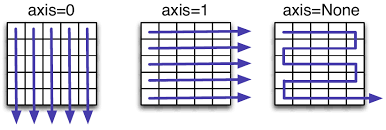

### Array broadcasting

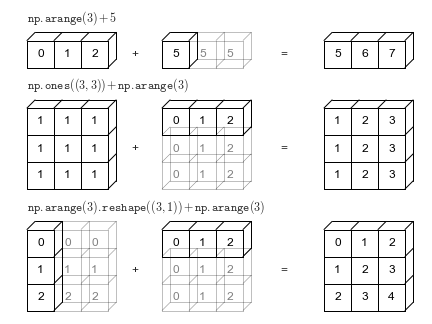

In [95]:
# element-by-elemnt operations
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [96]:
M = np.zeros((3, 3)) # matrix
v = np.array([0, 1, 2]) # vector

In [97]:
# row + number
v+2

array([2, 3, 4])

In [98]:
# matix + row
M+v

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

In [99]:
# row + column
a = np.arange(3)
b = np.arange(3)

In [100]:
a+b # elemebt-wise

array([0, 2, 4])

In [101]:
a+b[:, np.newaxis] # result is matrix

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Rules of broadcasting

• Rule 1: If the two arrays differ in their number of dimensions, the shape of the
one with fewer dimensions is padded with ones on its leading (left) side.

• Rule 2: If the shape of the two arrays does not match in any dimension, the array
with shape equal to 1 in that dimension is stretched to match the other shape.

• Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is
raised

### Masking and fancy indexing

In [103]:
M = np.random.random([5,6]) 
M
M < 0.5 # boolean masking

array([[ True, False,  True,  True, False,  True],
       [ True, False, False,  True,  True,  True],
       [False,  True, False, False, False,  True],
       [ True, False, False, False, False, False],
       [False, False, False, False,  True,  True]])

In [104]:
# count 
print(np.count_nonzero(M < 0.5)) # count number of elements < 0.5
print(np.sum(M < 0.5)) # the same

13
13


In [105]:
# check if is in
print(np.any(M < 0)) # is there are any element < 0?
print(np.all(M > 0)) # is all element > 0?

False
True


In [106]:
# mask
M[M < 0.5] = 0 # all elements less than 0.5 make to be zero
M

array([[0.        , 0.66606747, 0.        , 0.        , 0.64970435,
        0.        ],
       [0.        , 0.7848377 , 0.98820973, 0.        , 0.        ,
        0.        ],
       [0.71359144, 0.        , 0.80375794, 0.69304594, 0.84692907,
        0.        ],
       [0.        , 0.64495675, 0.66728677, 0.50461238, 0.57044911,
        0.62871784],
       [0.81872898, 0.97726254, 0.84400264, 0.89542183, 0.        ,
        0.        ]])

In [52]:
# sum
np.sum(M[M > 0.1]) # sum all element > 0.1

10.228428344507812

In [ ]:
# fancy indexing

## Sorting: np.sort and np.argsort

In [107]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [110]:
# do you know what's the difference? 
x.sort()
x

array([1, 2, 3, 4, 5])

### Real example with spectrogram

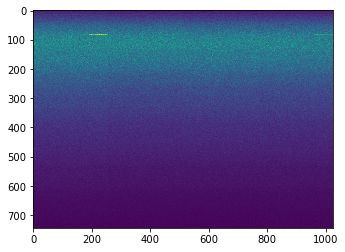

In [87]:
# load a radio spectrogram and see sum spectrum and mean spectrum
path = '/home/dzyga/My/Python/Univer/astronomy_python/NumPy_intro/'
spectrogram = np.loadtxt(path + 'DynamicSpectrum.txt')
fig1 = plt.figure()
plt.imshow(spectrogram);

(1024,)


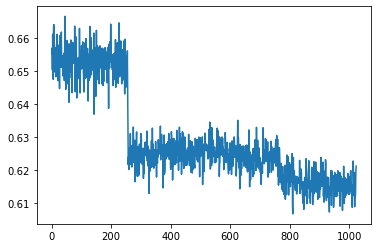

In [88]:
time = spectrogram.mean(axis=0)
plt.figure()
plt.plot(time)
print(time.shape) # What's the length of this vector? 

(744,)


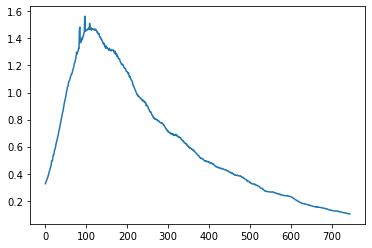

In [89]:
# Mean over axes 
sp = spectrogram.mean(axis=1) # mean spectrum
plt.figure()
plt.plot(sp)
print(sp.shape) # What's the length of this vector? 

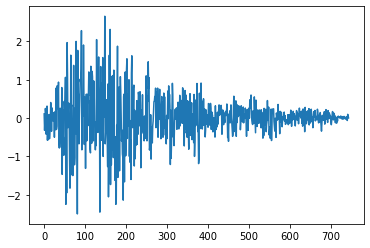

In [90]:
# Now extract mean spectrum from a spectrogram
spectrogram_flat = spectrogram - sp[:, np.newaxis]
#spectrogram_flat = spectrogram.T - sp

spectrogram_flat *= 1e13
plt.figure()
#plt.imshow(spectrogram_flat)
plt.plot(spectrogram_flat.sum(axis=1));

In [91]:
# set threshold
spectrogram_flat[spectrogram_flat > 1] = 1
spectrogram_flat[spectrogram_flat < -1] = -1

In [21]:
#pectrogram_flat[np.abs(spectrogram_flat)<1]
#pectrogram_flat

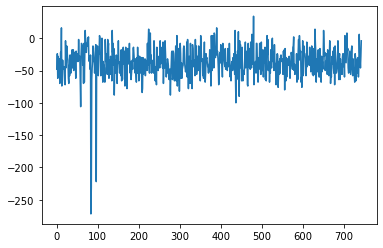

In [92]:
plt.figure()
#plt.imshow(spectrogram_flat)
plt.plot(spectrogram_flat.sum(axis=1))

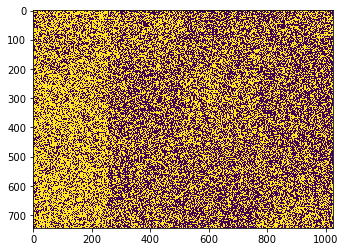

In [93]:
plt.imshow(spectrogram_flat);

### Binaproximation algorithm 

### Read FITS files with astropy  

In [106]:
from astropy.io import fits
fitsname = 'image0.fits'
hdulist = fits.open(fitsname)
pic = hdulist[0].data
#plt.imshow(pic)

In [108]:
fitsnames = ['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits', 'image4.fits',
               'image5.fits', 'image6.fits', 'image7.fits', 'image8.fits',
                    'image9.fits', 'image10.fits', 'image11.fits']

DataCube = np.zeros([pic.shape[0], pic.shape[1], len(fitsnames)])
for (i, name) in enumerate(fitsnames):
    hdulist = fits.open(fitsname)
    onefits = hdulist[0].data
    DataCube[:,:,i] = onefits

In [112]:
def running_stats(filenames):
    n = 0
    for filename in filenames:
        hdulist = fits.open(filename)
        data = hdulist[0].data
        
        if n == 0:
            mean = np.zeros_like(data)
            s = np.zeros_like(data)

        n += 1
        delta = data - mean
        mean += delta/n
        s += delta*(data - mean)
        hdulist.close()

    s /= n - 1
    np.sqrt(s, s)

    if n < 2:
        return mean, None
    else:
        return mean, s

mean, std = running_stats(fitsnames)

(200, 200)

In [126]:
Nbins = 10

minval = mean - std
maxval = mean - std

width = 2*std/Nbins
width

array([[0.00033097, 0.00093091, 0.00076656, ..., 0.00054755, 0.00045247,
        0.00049464],
       [0.00075216, 0.00137519, 0.00071812, ..., 0.0008737 , 0.00084276,
        0.00093348],
       [0.00035459, 0.00018723, 0.00036599, ..., 0.00046182, 0.00118852,
        0.00128933],
       ...,
       [0.00137186, 0.00181735, 0.00080385, ..., 0.00060974, 0.00056891,
        0.0010518 ],
       [0.00082134, 0.00142524, 0.0012031 , ..., 0.00055047, 0.00038345,
        0.00034049],
       [0.00166395, 0.00144113, 0.00156112, ..., 0.00054246, 0.00048023,
        0.00012169]])

In [128]:
# create a histogram to count how many points fall into each bin

histogram = np.zeros(200, 200, Nbins)

for i in vec:
    if i < minval:
        histogram[0] += 1
    elif i < maxval:
        bins = int((i - (minval))/width)
        histogram[bins] += 1

# find the midpoint
        
N = len(vec)
mid = (N + 1)/2

count = 0
for b, bincount in enumerate(histogram):
    count += bincount
    if count >= mid:
      # Stop when the cumulative count exceeds the midpoint
      break
print(count)
print(histogram.shape)
print(b)
        
median = minval + width*(b + 0.5)
        
plt.figure()
plt.hist(vec)


np.median(vec)
median

TypeError: data type not understood

In [84]:
def median_bins(images, B):
    # images - list 
    # number of bins
    mean, std = running_stats(images)

    # Initialise bins
    first_bin = 0
    histogram = np.zeros(B)
    bin_width = 2*std/B
    
    # Bin values
    for x in data:
        if x < mean - std:
            first_bin += 1 # just count whole first the very left bin
        elif x < mean + std: # we need this data range
            bin = int((x - (mean - std))/bin_width) #count number of a bin

        histogram[bin] += 1
        # Ignore values above mean + std

    return mean, std, first_bin, histogram

In [74]:
mean, std, left_bin, bins = median_bins_fits(['image0.fits', 'image1.fits', 'image2.fits'], 5)
median = median_approx_fits(['image0.fits', 'image1.fits', 'image2.fits'], 5)
mean[100, 100]
0.018398113548755646
>>> std[100, 100]
0.010496325561403296
>>> left_bin[100, 100]
0.0
>>> bins[100, 100, :]
array([ 0.,  2.,  0.,  0.,  0.])
>>> median[100, 100]
0.014199583324194326